## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

## 2. Import Data 

In [2]:
cancer_data=load_breast_cancer()

In [3]:
cancer_data_set=pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_data_set['target']=cancer_data.target
cancer_data_set.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 3. Data Understanding

### 3.1 Initial Analysis

In [4]:
cancer_data_set.shape

(569, 31)

In [5]:
cancer_data_set.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
cancer_data_set.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [7]:
cancer_data_set.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 4. Model Building

In [8]:
X=cancer_data_set.drop('target', axis=1)
y=cancer_data_set[['target']]

In [9]:
X.shape, y.shape

((569, 30), (569, 1))

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=10, stratify=y, shuffle=True)

In [11]:
X_train.shape, y_train.shape

((426, 30), (426, 1))

In [12]:
X_test.shape, y_test.shape

((143, 30), (143, 1))

## 5. Model training

In [15]:
svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC()

## 6. Model Testing

### For training data

In [16]:
y_pred_train=svm_model.predict(X_train)

In [17]:
print('Accuracy Score:', accuracy_score(y_train, y_pred_train))

Accuracy Score: 0.9295774647887324


In [18]:
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_train))

Confusion Matrix:
 [[134  25]
 [  5 262]]


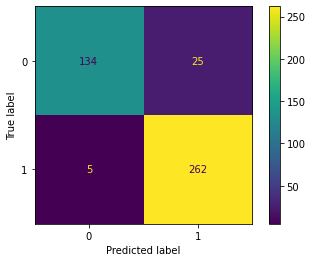

In [19]:
plot_confusion_matrix(estimator=svm_model, X= X_train, y_true=y_train)
plt.show()

### For testing data

In [20]:
y_pred_test=svm_model.predict(X_test)

In [21]:
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.8951048951048951


In [22]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[40 13]
 [ 2 88]]


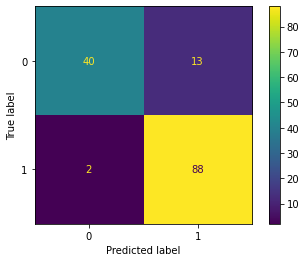

In [23]:
plot_confusion_matrix(estimator=svm_model, X= X_test, y_true=y_test)
plt.show()

In [24]:
grid_search=GridSearchCV(estimator=svm_model, param_grid={'C':[0.001, 0.01, 0.1, 1, 10],  
                                                          'gamma':[0.001,0.01,0.1,1,10],
                                                          'kernel':['rbf']})
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.9226207110697097


In [25]:
grid_search=GridSearchCV(estimator=svm_model, param_grid={'C':[0.001, 0.01, 0.1, 1, 10],  
                                                          'gamma':[0.001,0.01,0.1,1,10],
                                                          'kernel':['linear']})
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.9525694767893185


In [ ]:
grid_search=GridSearchCV(estimator=svm_model, param_grid={'C':[0.001, 0.01, 0.1, 1, 10],  
                                                          'gamma':[0.001,0.01,0.1,1,10],
                                                          'kernel':['poly']})
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

This will take long running time, so we will not use this kernal

In [ ]:
grid_search=GridSearchCV(estimator=svm_model, param_grid={'C':[0.001, 0.01, 0.1, 1, 10],  
                                                          'gamma':[0.001,0.01,0.1,1,10],
                                                          'kernel':['sigmoid']})
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)